# Bitome Knowledgebase: Example Usage

The following notebook provides some demonstrations for the usage of the Bitome knowledgebase.

Requires Python 3.7 and the following third-party packages (all can be installed via `pip install <package>`)
- biopython
- CAI
- matplotlib
- numpy
- pandas
- scipy
- seaborn

## Import the Knowledgebase Class

The following code imports the base class, called Bitome, that will load and contain the knowledgebase (along with a
useful built-in Python package for ensuring compatibility of file paths across operating systems):

In [1]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import networkx as nx

sys.path.append('../bitome-kb/')

from bitome.core import Bitome

## Save and Reload the Knowledgebase

For convenience, the fully-loaded Bitome knowledgebase can be dumped to a `pickle` file for easy re-loading
if the underlying data has not changed. Once the following cell has been executed, the `bitome.pkl` file created in the
`data` directory can be loaded (instead of running the more time-consuming `load_data` method).

In [2]:
# now, let's initiate a new Bitome knowledgebase from that file
bitome = Bitome.init_from_file('bitome.pkl')

## Exploring the Bitome 


The Bitome knowledgebase is a collection of heavily-linked objects. These objects may be accessed via attributes of the bitome object we've instantiated above. An example of such "link-hopping" is given below:

### Simple Example of Link-Hopping

In [3]:
# pull out the speB gene (chosen at random) from the master list of genes in the knowledgebase 
# NOTE: I just entered 3000 and then later added this comment to determine the gene is speB; I need to add 
# a convenient function for pulling out a gene object by name...
speB = bitome.genes[3000]

# print out some features of this gene
print(f'Gene name: {speB.name}')
print(f'Gene location: {speB.location}')
print(f'Gene sequence: {speB.sequence}')
print(f'Type of random_gene object: {type(speB)}')

Gene name: speB
Gene location: [3082876:3083797](-)
Gene sequence: ATGAGCACCTTAGGTCATCAATACGATAACTCACTGGTTTCCAATGCCTTTGGTTTTTTACGCCTGCCGATGAACTTCCAGCCGTATGACAGCGATGCAGACTGGGTGATTACTGGCGTGCCGTTCGATATGGCCACTTCTGGTCGTGCGGGTGGTCGCCACGGTCCGGCAGCGATCCGTCAGGTTTCGACGAATCTGGCCTGGGAACACAACCGCTTCCCGTGGAATTTCGACATGCGTGAGCGTCTGAACGTCGTGGACTGCGGCGATCTGGTATATGCCTTTGGCGATGCCCGTGAGATGAGCGAAAAGCTGCAGGCGCACGCCGAGAAGCTGCTGGCTGCCGGTAAGCGTATGCTCTCTTTCGGTGGTGACCACTTTGTTACGCTGCCGCTGCTGCGTGCTCATGCGAAGCATTTCGGCAAAATGGCGCTGGTACACTTTGACGCCCACACCGATACCTATGCGAACGGTTGTGAATTTGACCACGGCACTATGTTCTATACCGCGCCGAAAGAAGGTCTGATCGACCCGAATCATTCCGTGCAGATTGGTATTCGTACCGAGTTTGATAAAGACAACGGCTTTACCGTGCTGGACGCCTGCCAGGTGAACGATCGCAGCGTGGATGACGTTATCGCCCAAGTGAAACAGATTGTGGGTGATATGCCGGTTTACCTGACTTTTGATATCGACTGCCTGGATCCTGCTTTTGCACCAGGCACCGGTACGCCAGTGATTGGCGGCCTGACCTCCGATCGCGCTATTAAACTGGTACGCGGCCTGAAAGATCTCAACATTGTTGGGATGGACGTAGTGGAAGTGGCTCCGGCATACGATCAGTCGGAAATCACTGCTCTGGCAGCGGCAACGCTGGCGCTGGAAATGCTGTATATTCAGGCGGCGAAAAAGGGCGAGTAA
Type of ran

So we've pulled out the speB gene. It is represented by an object of type Gene. The Gene object (and other types of features within the Bitome, as we'll see in a moment) has some useful attributes such as its absolute location, its sequence, its name, and links to other related objects.

Note that: speB is on the reverse strand. However, the sequence attribute is in the CODING direction.

Now, let's say we're interested in where the TSS (or multiple TSS for this gene are located). Let's first access any transcription units associated with this gene:

In [4]:
speB.transcription_units

So this particular gene is involved in two transcription units; let's pull out some information on them:

In [5]:
for speB_tu in speB.transcription_units:
    print(f'TU name: {speB_tu.name}')
    print(f'Part of operon: {speB_tu.operon.name}')
    print(f'TU location: {speB_tu.location}')
    print(f'TU object type: {type(speB_tu)}')
    print('\n')

TU name: speB
Part of operon: speAB
TU location: [3082876:3083946](-)
TU object type: <class 'bitome.features.TranscriptionUnit'>


TU name: speAB
Part of operon: speAB
TU location: [3082876:3086048](-)
TU object type: <class 'bitome.features.TranscriptionUnit'>




What about promoters? Each TranscriptionUnit object has a promoter attribute, which in turn links to things like TF binding sites, attenuators, and more:

NOTE: not all TUs have an annotated promoter (in those cases, the tu.promoter attribute will be `None`)

The Promoter object houses the TSS information:

In [6]:
for speB_tu in speB.transcription_units:
    print(f'TU name: {speB_tu.name}')
    print(f'Promoter name: {speB_tu.promoter.name}')
    print(f'Promoter location: {speB_tu.promoter.location}')
    print(f'Promoter object type: {type(speB_tu.promoter)}')
    print('\n')

TU name: speB
Promoter name: speBp
Promoter location: [3083925:3084006](-)
Promoter object type: <class 'bitome.features.Promoter'>


TU name: speAB
Promoter name: speAp
Promoter location: [3086027:3086108](-)
Promoter object type: <class 'bitome.features.Promoter'>




Let's see how we would locate all TSS for a given gene in a one-liner:

In [7]:
[tu.promoter.tss for tu in speB.transcription_units]

[3083946, 3086048]

Note that these TSS are in very different places becauseone of them skips the speA gene entirely

### Bitome Table of Contents

The Bitome contains master lists of many different types of objects, all that can be located on the provided reference sequence. Below is shown a master list of those attributes:

In [8]:
print(f'Genes: {len(bitome.genes)}')
print(f'Proteins: {len(bitome.proteins)}')
print(f'Mobile Elements: {len(bitome.mobile_elements)}')
print(f'Repeat Regions: {len(bitome.repeat_regions)}')
print(f'Operons: {len(bitome.operons)}')
print(f'Transcription Units: {len(bitome.transcription_units)}')
print(f'Promoters: {len(bitome.promoters)}')
print(f'Terminators: {len(bitome.terminators)}')
print(f'Attenuators: {len(bitome.attenuators)}')
print(f'Shine-Dalgarnos: {len(bitome.shine_dalgarnos)}')
print(f'Riboswitches: {len(bitome.riboswitches)}')
print(f'Transcription Factors: {len(bitome.transcription_factors)}')
print(f'TF binding sites: {len(bitome.tf_binding_sites)}')
print(f'Regulons: {len(bitome.regulons)}')
print(f'iModulons: {len(bitome.i_modulons)}')

Genes: 4497
Proteins: 4140
Mobile Elements: 49
Repeat Regions: 355
Operons: 2619
Transcription Units: 3560
Promoters: 8631
Terminators: 512
Attenuators: 1466
Shine-Dalgarnos: 179
Riboswitches: 51
Transcription Factors: 224
TF binding sites: 3235
Regulons: 493
iModulons: 61


The Bitome also retains the full sequence, along with the GenBank record and ID:

In [9]:
print(f'GenBank ID: {bitome.genbank_id}')
print(f'Full Sequence (first 200 bps): {bitome.sequence[:200]}')
print(f'GenBank description: {bitome.description}')

GenBank ID: NC_000913.3
Full Sequence (first 200 bps): AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCAT
GenBank description: Escherichia coli str. K-12 substr. MG1655, complete genome


### Bitome Linkage Map

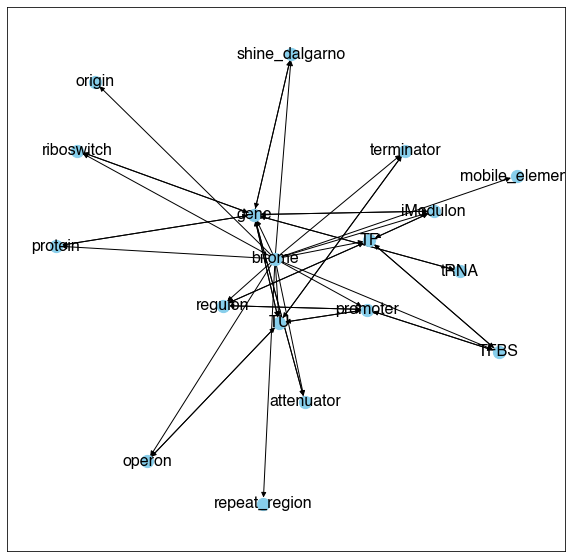

In [10]:
bitome_graph = nx.MultiDiGraph()
bitome_graph.add_edges_from([
    ('bitome', 'gene', 'multi'),
    ('gene', 'protein', 'single'),
    ('gene', 'tRNA', 'single'),
    ('gene', 'TU', 'multi'),
    ('gene', 'attenuator', 'multi'),
    ('gene', 'riboswitch', 'multi'),
    ('gene', 'shine_dalgarno', 'single'),
    ('gene', 'iModulon', 'multi'),
    ('bitome', 'protein', 'multi'),
    ('protein', 'gene', 'single'),
    ('tRNA', 'gene', 'single'),
    ('bitome', 'mobile_element', 'multi'),
    ('bitome', 'repeat_region', 'multi'),
    ('bitome', 'origin', 'single'),
    ('bitome', 'operon', 'multi'),
    ('operon', 'TU', 'multi'),
    ('bitome', 'TU', 'multi'),
    ('TU', 'operon', 'single'),
    ('TU', 'promoter', 'single'),
    ('TU', 'gene', 'multi'),
    ('TU', 'terminator', 'multi'),
    ('bitome', 'promoter', 'multi'),
    ('promoter', 'TU', 'single'),
    ('promoter', 'TFBS', 'multi'),
    ('promoter', 'regulon', 'multi'),
    ('bitome', 'terminator', 'multi'),
    ('terminator', 'TU', 'multi'),
    ('bitome', 'attenuator', 'multi'),
    ('attenuator', 'gene', 'single'),
    ('bitome', 'shine_dalgarno', 'multi'),
    ('shine_dalgarno', 'gene', 'single'),
    ('bitome', 'riboswitch', 'multi'),
    ('riboswitch', 'gene', 'single'),
    ('bitome', 'TF', 'multi'),
    ('TF', 'TFBS', 'multi'),
    ('TF', 'regulon', 'multi'),
    ('TF', 'iModulon', 'multi'),
    ('bitome', 'regulon', 'multi'),
    ('regulon', 'promoter', 'multi'),
    ('regulon', 'TF', 'multi'),
    ('bitome', 'iModulon', 'multi'),
    ('iModulon', 'TF', 'multi'),
    ('iModulon', 'gene', 'multi'),
    ('bitome', 'TFBS', 'multi'),
    ('TFBS', 'TF', 'single'),
    ('TFBS', 'promoter', 'multi')
])

_, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx(
    bitome_graph,
    pos=nx.spring_layout(bitome_graph, k=1),
    ax=ax,
    node_size=150,
    node_color='skyblue',
    font_size='16'
)

## Utilities

A function for finding a feature with a given name.

In [11]:
glpR = [gene for gene in bitome.genes if gene.name == 'glpR'][0]
print(glpR.name)
print(glpR.location)

glpR
[3559847:3560605](-)


Sequence location slicing

This example shows how to extract an arbitrary genomic locus from the main sequence. Let's say we wanted to pull out the sequence of the 5' UTR for glpR (from above). Note that glpR is on the (-), or reverse, strand; so the "right" end of the position is the 5' end. 

In Biopython's SeqLocation terms, left = "start" and right = "end", REGARDLESS of strand. It's annoying and confusing...

I can write some better utility functions for this sort of thing if desired.

In [12]:
from Bio.SeqFeature import FeatureLocation

# so we're giving as the left end, the START of the gene, which is the "end" of its location...
# and as the right end for the 5' UTR, we're giving the TSS for the promoter (just taking the first one arbitrarily)
FeatureLocation(glpR.location.end.position, glpR.transcription_units[0].promoter.tss).extract(bitome.sequence)

Seq('TTATAAATCCCTGGAATTATTTTCGTTTTCGCGCATTGAGCGAATCAACAAAAG...AGT', IUPACAmbiguousDNA())

## There are a lot of possibilities for accessing data from the Bitome knowledgebase, so please ask! Also, don't be afraid to dive into the source code (in the `bitome` directory), it is very heavily commented and documented. 